In [1]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import control
from control.matlab import ctrb, place, obsv

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
# Example 0
A = [[0, 1], 
     [-1, 0]]

B = [[0], 
     [1]]

C = [[1,0]]

print(A)

[[0, 1], [-1, 0]]


In [4]:
# Exosystem
S = [[0]]

# Reference signal and matrix
ref = -10
R = [[1]]

In [5]:
# Compute eigenvalues, eigenvectors
w,v = eig(A)
print('eigenvalues:', w)

eigenvalues: [0.+1.j 0.-1.j]


In [6]:
# Controllability matrix
W_c = ctrb(A, B)
matrix_rank(W_c)

np.int64(2)

In [7]:
# Eigenvalue assignment
P = place(A,B,[-1,-2])
F1 = -P
print(F1)

w,v = eig(A+B*F1)
print('eigenvalues:', w)

[[-1. -3.]]
eigenvalues: [-1. -2.]


In [8]:
# Design of F2 and F
F2 = [[2]] # F2 = U-F1*X

F = np.concatenate((F1, F2), axis=1)
print(F)

[[-1. -3.  2.]]


In [9]:
# Closed-loop system matrix
X1 = np.concatenate((A+np.dot(B,F1), np.dot(B,F2)), axis=1)
X2 = np.concatenate((np.zeros((1,2)), S), axis=1)
A_cl = np.concatenate((X1,X2), axis=0)

print(A_cl)

w_cl,v_cl = eig(A_cl)
print('eigenvalues:', w_cl)

[[ 0.  1.  0.]
 [-2. -3.  2.]
 [ 0.  0.  0.]]
eigenvalues: [-1. -2.  0.]


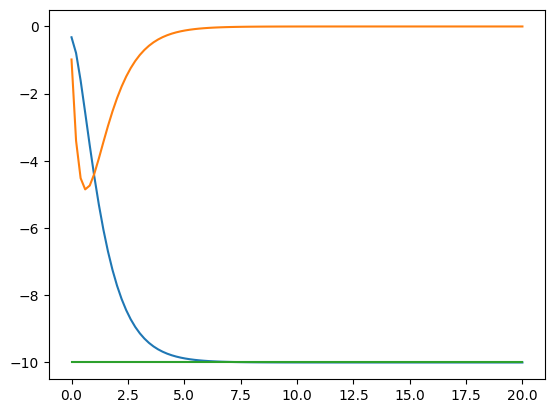

In [10]:
# Plot
def f(t, x):
    return np.dot(A_cl,x)

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution             
x0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1), ref] # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for solution
x[0,:] = x0
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, x)
plt.show()

[[-1.  0.  1.]]


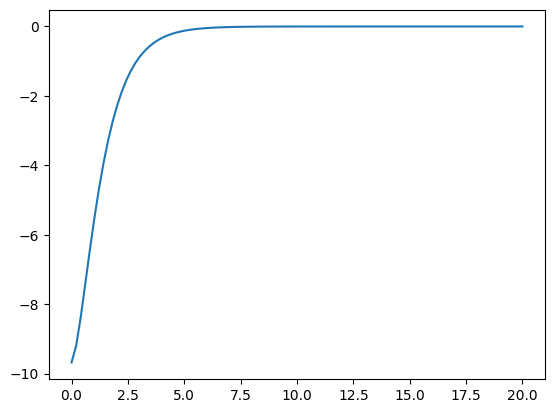

In [11]:
# Tracking error
e = np.zeros((len(t), 1))

E = np.concatenate((np.zeros((1,2))-C,R), axis=1)
print(E)

for i in range(0, t.size):
   e[i, :] = np.dot(E,x[i, :])
plt.plot(t, e)
plt.show()